4. Implementing regression using deep neural network.

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the Boston Housing dataset
boston = fetch_openml(name='boston')
X, y = boston.data, boston.target

C:\Users\ajays\anaconda3\envs\hakthon\Lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


In [3]:
# Step 3: Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [14]:
# Step 5: Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1) # Output layer with one neuron for regression
])

C:\Users\ajays\anaconda3\envs\hakthon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Step 6: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16,
validation_split=0.1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 572.0829 - val_loss: 513.1340
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 506.9306 - val_loss: 384.7095
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 374.9964 - val_loss: 193.9644
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 172.4676 - val_loss: 52.8506
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.5356 - val_loss: 32.5305
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.6910 - val_loss: 29.4762
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.1050 - val_loss: 30.8195
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.8177 - val_loss: 30.0638
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.7749 - val_loss: 29.9247
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.1381 - val_loss: 29.0264
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.8612 - val_loss: 28.6912
Epoch 12/100
23/23 ━━━━━━━━━━━━━━

In [17]:
# Step 8: Make predictions
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [18]:
# Step 9: Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12.031351254432453


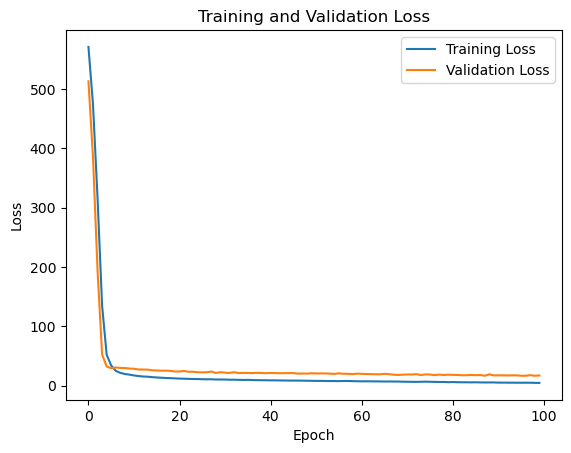

In [19]:
# Step 10: Visualize training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# Step 11: Sample Prediction Output
print("Sample Prediction Output:")
for i in range(min(10, len(y_test))): # Ensure we don't exceed the length of y_test
 print("Sample", i+1)
 print("Predicted Price:", y_pred[i][0]) # Access the predicted 

Sample Prediction Output:
Sample 1
Predicted Price: 27.448816
Sample 2
Predicted Price: 35.758713
Sample 3
Predicted Price: 17.04322
Sample 4
Predicted Price: 25.317898
Sample 5
Predicted Price: 15.348472
Sample 6
Predicted Price: 19.913147
Sample 7
Predicted Price: 17.437523
Sample 8
Predicted Price: 14.046138
Sample 9
Predicted Price: 26.38552
Sample 10
Predicted Price: 18.132774
